In [ ]:
import json
import matplotlib.pyplot as plt
from pathlib import Path



In [10]:

metrics_dir = Path(r"C:\FYP\PROJECT\product\artifacts\runs")

# Load all JSONs
metrics_files = sorted(metrics_dir.glob("baseline_cnn_metrics_e*.json"))
metrics = []

for f in metrics_files:
    with open(f) as j:
        data = json.load(j)
        data['epoch'] = int(f.stem.split('_e')[-1])
        metrics.append(data)


In [11]:
epochs = [m['epoch'] for m in metrics]
train_acc = [m['train_acc'] for m in metrics]
val_acc = [m['val_acc'] for m in metrics]
train_loss = [m['train_loss'] for m in metrics]
val_loss = [m['val_loss'] for m in metrics]


epochs     : [1, 3, 5, 10]
train_acc  : [0.11078125, 0.39375, 0.51, 0.72625]
val_acc    : [0.14553404122423486, 0.3466583385384135, 0.5078076202373517, 0.5933791380387258]
train_loss : [3.2888995945453643, 1.9746295261383056, 1.560204895287752, 0.8625953543186188]
val_loss   : [2.992841175539206, 2.141273508661617, 1.5572891196632743, 1.300951435799006]


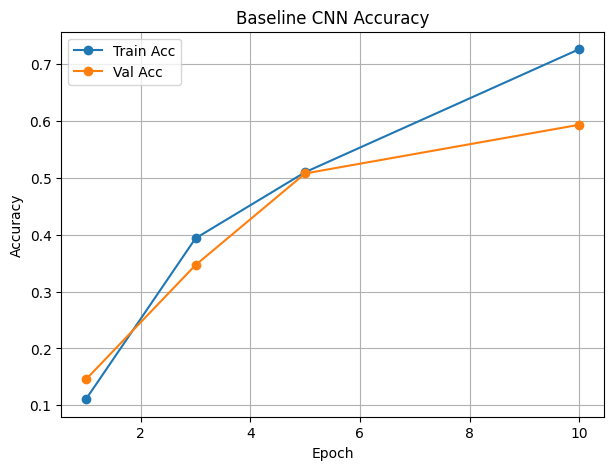

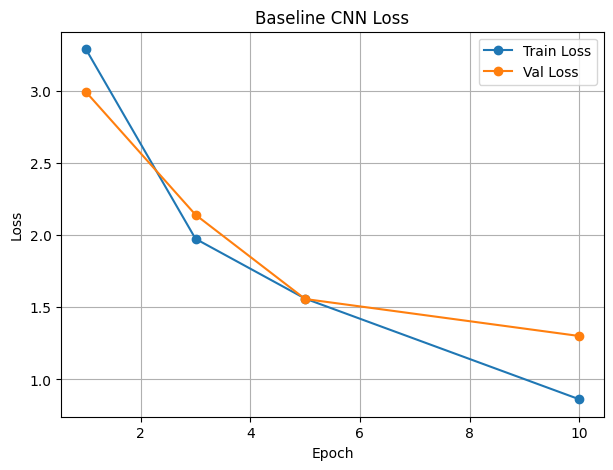

ERROR: Failed to launch TensorBoard (exited with 4294967295).
Contents of stderr:
C:\Users\Devansh Dev\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorboard\default.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
TensorFlow installation not found - running with reduced feature set.
E1106 15:41:18.311715 28744 program.py:300] TensorBoard could not bind to port 6006, it was already in use
ERROR: TensorBoard could not bind to port 6006, it was already in use

In [ ]:
import json
from pathlib import Path
import matplotlib.pyplot as plt

# 1) Point to metrics folder
metrics_dir = Path(r"C:\FYP\PROJECT\product\artifacts\runs")
files = sorted(metrics_dir.glob("baseline_cnn_metrics_e*.json"))

def last_scalar(v):
    # v can be a scalar or a list; always return a float scalar
    if isinstance(v, (list, tuple)):
        return float(v[-1])
    return float(v)

epochs, train_acc, val_acc, train_loss, val_loss = [], [], [], [], []

for f in files:
    with open(f) as j:
        d = json.load(j)
    ep = int(f.stem.split("_e")[-1])       # e1, e3, e5, e10 -> 1,3,5,10
    epochs.append(ep)
    train_acc.append(last_scalar(d["train_acc"]))
    val_acc.append(last_scalar(d["val_acc"]))
    train_loss.append(last_scalar(d["train_loss"]))
    val_loss.append(last_scalar(d["val_loss"]))

z = sorted(zip(epochs, train_acc, val_acc, train_loss, val_loss), key=lambda x: x[0])
epochs, train_acc, val_acc, train_loss, val_loss = map(list, zip(*z))

print("epochs     :", epochs)
print("train_acc  :", train_acc)
print("val_acc    :", val_acc)
print("train_loss :", train_loss)
print("val_loss   :", val_loss)

plt.figure(figsize=(7,5))
plt.plot(epochs, train_acc, 'o-', label='Train Acc')
plt.plot(epochs, val_acc, 'o-', label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Baseline CNN Accuracy'); plt.legend(); plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(epochs, train_loss, 'o-', label='Train Loss')
plt.plot(epochs, val_loss, 'o-', label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Baseline CNN Loss'); plt.legend(); plt.grid(True)
plt.show()


plt.figure(figsize=(7,5))
plt.plot(epochs, train_loss, 'o-', label='Train Loss')
plt.plot(epochs, val_loss, 'o-', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Baseline CNN Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
